In [ ]:
pip install yfinance

In [3]:
import pandas as pd
import yfinance as yf
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

[*********************100%***********************]  1 of 1 completed
lr confidence:  0.7785781013219396


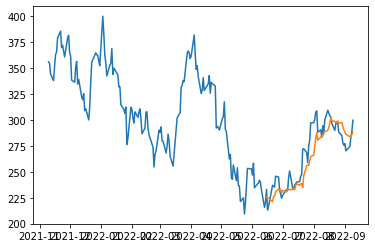

                 Close  Prediction
Date                              
2022-08-19  296.666656  299.098850
2022-08-22  289.913330  298.602261
2022-08-23  296.453339  297.113794
2022-08-24  297.096680  298.363538
2022-08-25  296.070007  298.946689
2022-08-26  288.089996  296.750083
2022-08-29  284.820007  297.635540
2022-08-30  277.700012  293.381278
2022-08-31  275.609985  290.506733
2022-09-01  277.160004  288.269028
2022-09-02  270.209991  286.152683
2022-09-06  274.420013  283.753595
2022-09-07  283.700012  285.181643
2022-09-08  289.260010  285.839603
2022-09-09  299.679993  288.628691


In [4]:
#@title Linear Regression
import warnings
warnings.filterwarnings("ignore")
data = yf.download(tickers='TSLA', #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="10mo",
 interval="1d") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
pd.set_option("max_rows", None)

df = data[['Close']]

df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
df['Volume'] = data[['Volume']]
# df['SMA_10'] = df['Close'].rolling(window=10).mean()
df = df.iloc[10:]

predict_df = df.iloc[-60:]

df.drop(df.tail(30).index,inplace = True)

# # df.ta.ema(close='Close', length=10, append=True)

X_train, X_test, y_train, y_test = train_test_split(df[['EMA_10', 'Volume']],df[['Close']], test_size=0.01)
# Test set
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)
# Use model to make predictions
y_test = predict_df['Close']
X_test = predict_df.drop(['Close'], axis = 1)

y_pred = model.predict(X_test)
lr_confidence = model.score(X_test, y_test)
print("lr confidence: ", lr_confidence)

df_compare = data[['Close']].tail(len(y_pred))
df_compare[['Prediction']] = y_pred.tolist()
# df_compare
plt.plot(data['Close'])
plt.plot(df_compare['Prediction'])
# print(df_compare)
plt.show()
print(df_compare.tail(15))


Decision Tree Regressor Confidence:  0.4559246583166848


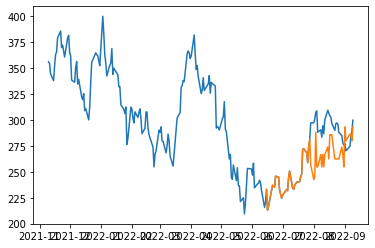

                 Close  Prediction
Date                              
2022-08-12  300.029999  266.679993
2022-08-15  309.320007  273.843323
2022-08-16  306.563324  262.369995
2022-08-17  303.996674  285.660004
2022-08-18  302.869995  285.660004
2022-08-19  296.666656  285.660004
2022-08-22  289.913330  262.369995
2022-08-23  296.453339  262.369995
2022-08-24  297.096680  262.369995
2022-08-25  296.070007  262.369995
2022-08-26  288.089996  262.369995
2022-08-29  284.820007  273.843323
2022-08-30  277.700012  266.679993
2022-08-31  275.609985  254.679993
2022-09-01  277.160004  293.296661
2022-09-02  270.209991  279.763336
2022-09-06  274.420013  286.323334
2022-09-07  283.700012  286.323334
2022-09-08  289.260010  279.763336
2022-09-09  299.679993  293.296661


In [8]:
tree_model = DecisionTreeRegressor()
tree = tree_model.fit(X_train, y_train)

y_test = predict_df['Close']
X_test = predict_df.drop(['Close'], axis = 1)

tree_pred = tree.predict(X_test)
tree_confidence = tree.score(X_test, y_test)
print("Decision Tree Regressor Confidence: ", tree_confidence)


df_compare = data[['Close']].tail(len(tree_pred))
df_compare['Prediction'] = tree_pred.tolist()
# df_compare
plt.plot(data['Close'])
plt.plot(df_compare['Prediction'])
# print(df_compare)
plt.show()
print(df_compare.tail(20))

In [ ]:
# data = yf.download(tickers='TSLA', #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
#  period="10mo",
#  interval="1d") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
# pd.set_option("max_rows", None)

# df = data[['Close']]

# df['EMA_10'] = df['Close'].ewm(span=10, adjust=False).mean()
# df['SMA_10'] = df['Close'].rolling(window=10).mean()
# df['Volume'] = data[['Volume']]
# df['day-before'] = df['Close'].shift(1)
# df['day-after'] = df['Close'].shift(-1)
# df = df.iloc[10:]

# df.loc[df['Close'] <= df['day-after'], 'Buy'] = 1
# df.loc[df['Close'] >df['day-after'], 'Buy'] = 0
# predict_df = df.iloc[-60:-1]
# df.drop(df.tail(30).index, inplace = True)


# X_train, X_test, y_train, y_test = train_test_split(predict_df[['EMA_10']],predict_df['Buy'], test_size=0.01)
# # Test set
# decision_tree_model = DecisionTreeClassifier()
# # Train the model
# print(y_train)
# decision_tree_model.fit(X_train, y_train)


# y_test = df['Close']
# X_test = df.drop(['Buy', 'day-after' , 'Close', 'EMA_10', 'Volume' ], axis = 1)
# print(X_test.tail(10))
# tree_pred = tree.predict(X_test)
# tree_confidence = tree.score(X_test, y_test)
# print("lr confidence: ", tree_confidence)
# print(tree_pred)


In [ ]:
#@title LSTM

data = yf.download(tickers='TSLA', #period: The number of days/month of data required. The valid frequencies are 1d, 5d, 1mo, 3mo, 6mo, 1y, 2y, 5y, 10y, ytd, max
 period="10mo",
 interval="1d") #interval: The frequency of data. The valid intervals are 1m, 2m, 5m, 15m, 30m, 60m, 90m, 1h, 1d, 5d, 1wk, 1mo, 3mo ,
pd.set_option("max_rows", None)

df = data[['Close']]
scale = MinMaxScaler(feature_range = (0,1))
scaled = scale.fit_transform(df)

train_len = int(len(scaled) * 0.75)
test = int(len(scaled)*0.25)
train = scaled[0:train_len, :]
test = scaled[train_len:len(scaled), :]

look_back = 1
model = Sequential()
model.add(
    LSTM(10,
        activation='relu',
        input_shape=(look_back,1))
)
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]

dataX = []
dataY =  []
for i in range(len(train)-look_back-1):
  a = train[i:(i+look_back), 0]
  dataX.append(a)
  dataY.append(train[i + look_back, 0])

trainX = np.array(dataX)
trainY = np.array(dataY)

trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

model.fit(trainX, trainY, epochs=25, batch_size=1, verbose=2)
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(testPredict)
